<a href="https://colab.research.google.com/github/Rajesh14/datasciencecoursera-repo/blob/master/Binary_Classication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

from sklearn.naive_bayes import GaussianNB



In [2]:
from google.colab import drive
drive.mount('/content/drive')
dataset= pd.read_csv('/content/drive/My Drive/colab/Covert_new.csv')
dataset.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,ASCII Code,Binary Signal
0,64428,1
1,32714,0
2,75036,1
3,16234,0
4,76468,0


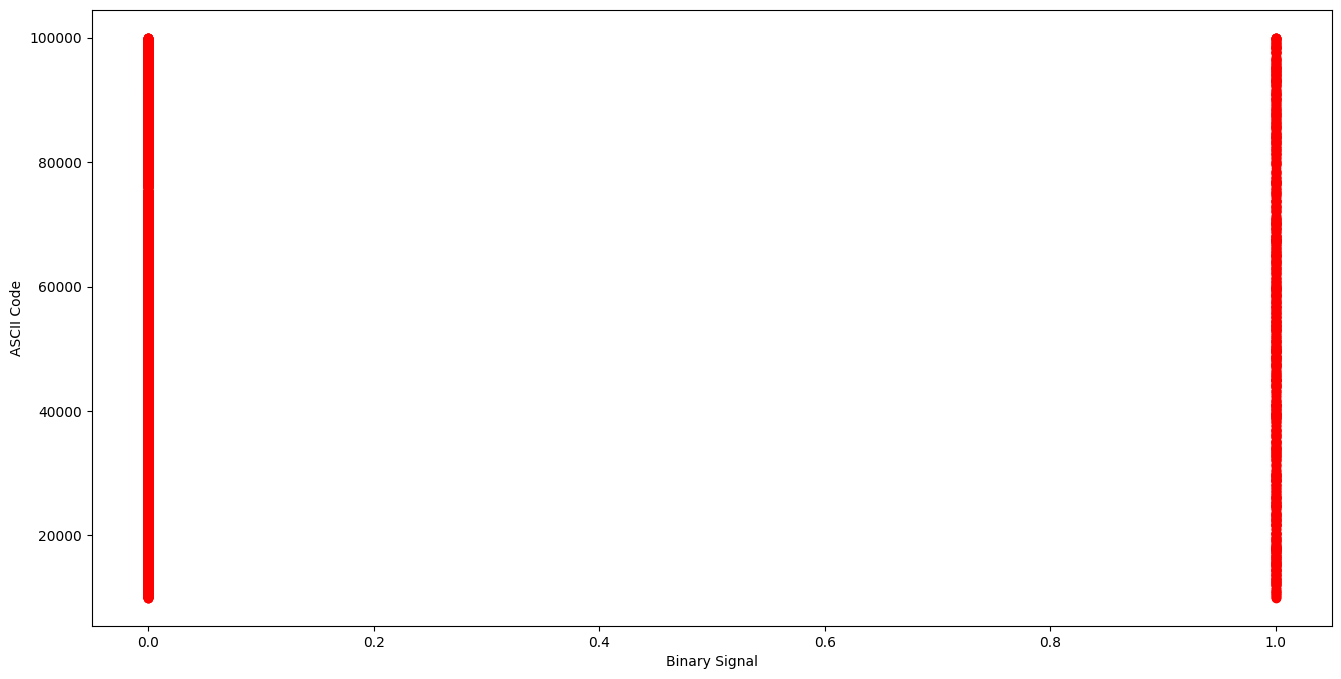

In [3]:
plt.figure(figsize=(16,8))
plt.scatter(dataset[['Binary Signal']], dataset[['ASCII Code']], color='red')
plt.ylabel('ASCII Code')
plt.xlabel('Binary Signal')
plt.show()

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   ASCII Code     5000 non-null   int64
 1   Binary Signal  5000 non-null   int64
dtypes: int64(2)
memory usage: 78.2 KB


In [5]:
X =dataset[['ASCII Code']]
X.head()

,ASCII Code
0,64428
1,32714
2,75036
3,16234
4,76468


In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(dataset['Binary Signal'])
y

array([1, 0, 1, ..., 0, 0, 0])

## **Logistic Regression Model:****

Accuracy1: 80.47


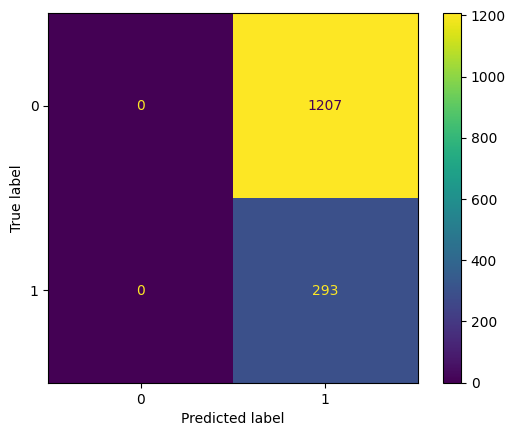

In [26]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Create logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy1: {accuracy*100:.2f}')

predicted = tf.squeeze(y_pred)
predicted = np.array([1 if x >= 0 else 0 for x in predicted])

actual = np.array(y_test)
conf_mat = confusion_matrix(actual, predicted)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
displ.plot()


## **AdaBoostClassifier**

In [27]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=0)
model1 = abc.fit(X_train, y_train)
y_pred = model1.predict(X_test)



AdaBoost Classifier Model Accuracy: 0.804


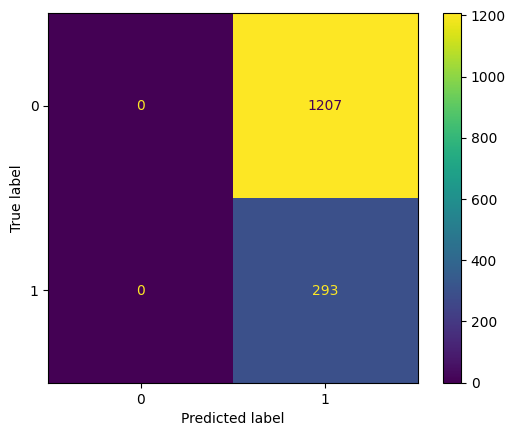

In [28]:
from sklearn.metrics import accuracy_score
print("AdaBoost Classifier Model Accuracy:", accuracy_score(y_test, y_pred))

predicted = tf.squeeze(y_pred)
predicted = np.array([1 if x >= 0 else 0 for x in predicted])

actual = np.array(y_test)
conf_mat = confusion_matrix(actual, predicted)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
displ.plot()



### **SVM Linear**

Accuracy: 80.27%


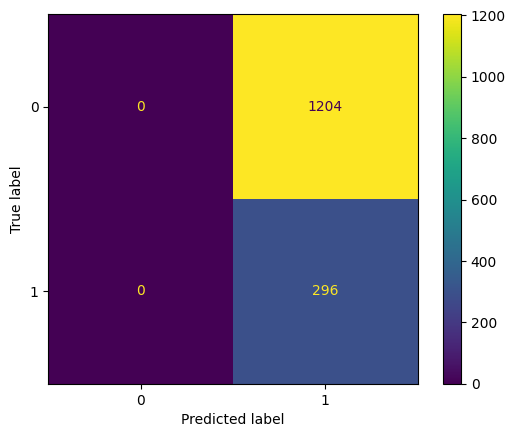

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an SVM classifier with a linear kernel
clf = SVC(kernel='linear')

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

predicted = tf.squeeze(y_pred)
predicted = np.array([1 if x >= 0 else 0 for x in predicted])

actual = np.array(y_test)
conf_mat = confusion_matrix(actual, predicted)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
displ.plot()


**SVM Gaussian**

Accuracy: 0.80


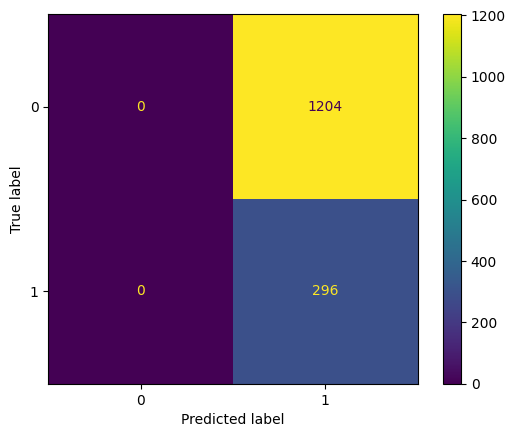

In [30]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an SVM classifier with a Gaussian (RBF) kernel
clf1 = SVC(kernel='rbf', gamma='scale')

# Train the classifier
clf1.fit(X_train, y_train)

# Make predictions
y_pred = clf1.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

predicted = tf.squeeze(y_pred)
predicted = np.array([1 if x >= 0 else 0 for x in predicted])

actual = np.array(y_test)
conf_mat = confusion_matrix(actual, predicted)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
displ.plot()


### **KNN 5**

Accuracy: 78.06%


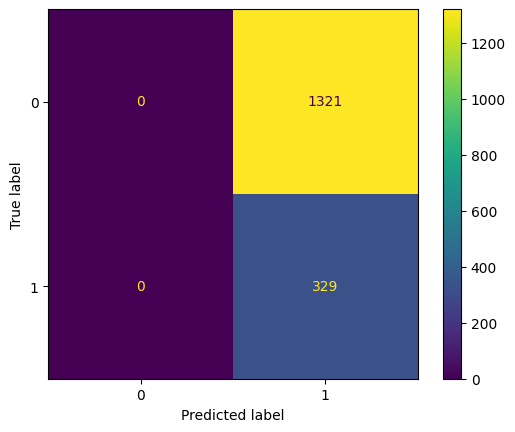

In [31]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Create the kNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = knn.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


predicted = tf.squeeze(y_pred)
predicted = np.array([1 if x >= 0 else 0 for x in predicted])

actual = np.array(y_test)
conf_mat = confusion_matrix(actual, predicted)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
displ.plot()


### **Decision Tree**

Accuracy: 0.682


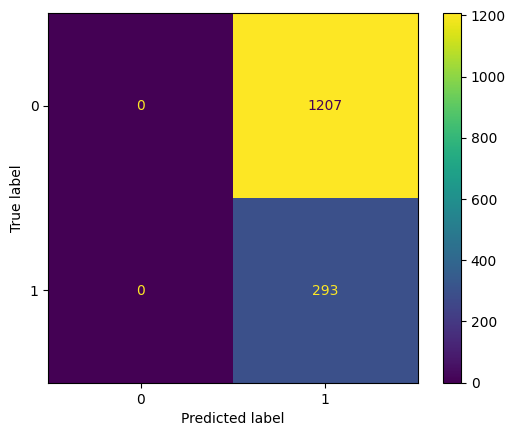

In [32]:


# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Create Decision Tree classifier object
clf3 = DecisionTreeClassifier()

# Train Decision Tree Classifier
clf3 = clf3.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf3.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", accuracy_score(y_test, y_pred))

# Plot the decision tree
###plt.show()

predicted = tf.squeeze(y_pred)
predicted = np.array([1 if x >= 0 else 0 for x in predicted])

actual = np.array(y_test)
conf_mat = confusion_matrix(actual, predicted)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
displ.plot()


**Naive Bayes**

Accuracy: 80.27%


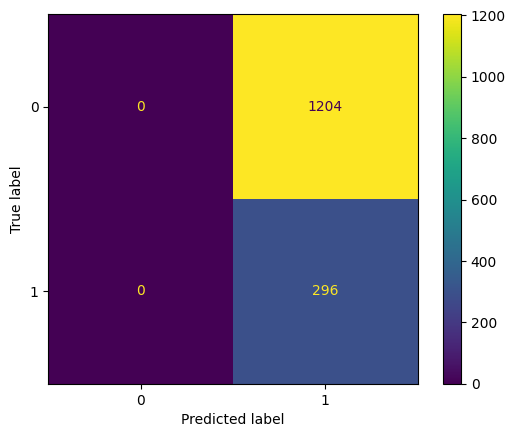

In [33]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Fit the model to the training data
gnb.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = gnb.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

predicted = tf.squeeze(y_pred)
predicted = np.array([1 if x >= 0 else 0 for x in predicted])

actual = np.array(y_test)
conf_mat = confusion_matrix(actual, predicted)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
displ.plot()


In [34]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X =dataset[['ASCII Code']]
X.head()
y =dataset[['Binary Signal']]
y

,Binary Signal
0,1
1,0
2,1
3,0
4,0
...,...
4995,0
4996,0
4997,0
4998,0


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
model = xgb.XGBClassifier(eval_metric='logloss')
model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

Accuracy: 80.40%


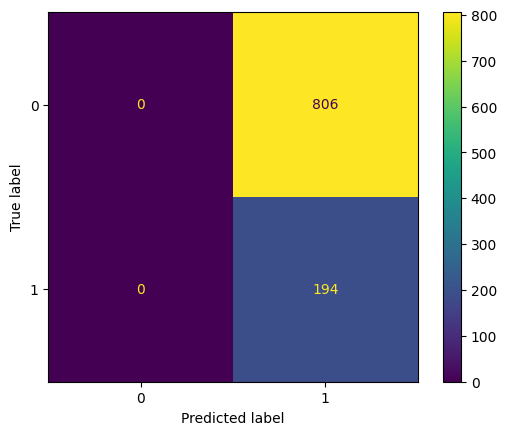

In [37]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
predicted = tf.squeeze(y_pred)
predicted = np.array([1 if x >= 0 else 0 for x in predicted])

actual = np.array(y_test)
conf_mat = confusion_matrix(actual, predicted)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
displ.plot()



/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy: 0.786
Precision: 0.551295518207283
Recall: 0.5149906628124121
F1 Score: 0.49698662078432476


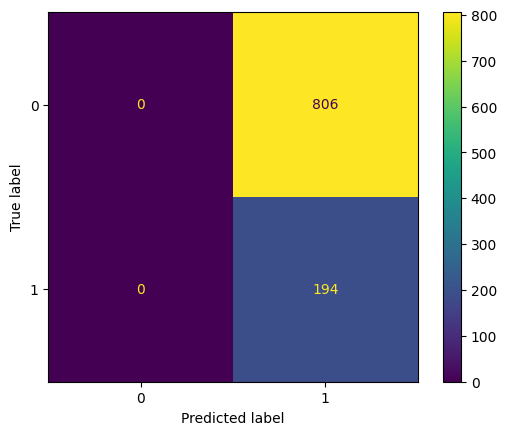

In [38]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the Wine dataset
#wine = load_wine()
#X, y = wine.data, wine.target

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predicting the test set results
y_pred_knn = knn_model.predict(X_test)

# Evaluating the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='macro')
recall_knn = recall_score(y_test, y_pred_knn, average='macro')
f1_knn = f1_score(y_test, y_pred_knn, average='macro')

# Print the results
print("Accuracy:", accuracy_knn)
print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("F1 Score:", f1_knn)

predicted = tf.squeeze(y_pred_knn)
predicted = np.array([1 if x >= 0 else 0 for x in predicted])

actual = np.array(y_test)
conf_mat = confusion_matrix(actual, predicted)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
displ.plot()
